In [1]:
%matplotlib inline

import os # locating directories

import numpy as np   # Arrays
import pandas as pd  # DataFrames

# Plotting
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['animation.embed_limit'] = 30000000.0
plt.rcParams['figure.dpi'] = 120
import seaborn as sns; sns.set()

from IPython.display import Image                # displaying .png images
from sklearn.preprocessing import StandardScaler # scaling features
from sklearn.preprocessing import LabelEncoder   # binary encoding
import random

image_dir = os.path.join(os.getcwd(),"Images")

In [2]:
col_dict = {
    "Adelie":"#ff7600",
    "Chinstrap":"#c65dcb",
    "Gentoo":"#057576"}

shape_dict = {
    "Adelie":"o",
    "Chinstrap":"s",
    "Gentoo":"X"}

datasets = {}
penguins = sns.load_dataset("penguins")

# dropna
penguins_rm = penguins.dropna()

# keep categorical features
penguins_cat = penguins_rm[["island", "sex", "species"]]
penguins_bin = penguins_cat[penguins_cat.species != "Chinstrap"]
y_bin = penguins_bin[["species"]].replace({'Adelie': 0, 'Gentoo': 1}).values.flatten()
# for the classification data we don't want species there either
penguins_class_feat = penguins_bin.drop("species", axis=1)
datasets['cat'] = {"df":penguins_bin, 
                    "X": penguins_class_feat[["island", "sex"]].values,
                    "y": y_bin,
                    "feats": ["island", "sex"],
                     "class": ['Adelie', 'Gentoo']}


# drop continuous features
penguins_cont = penguins_rm.drop(["island", "sex", "species"], axis=1)

# for the regression data we don't want body_mass_g there either
penguins_reg_feat = penguins_cont.drop(["body_mass_g"], axis=1)

datasets['reg_full'] = {"df":penguins_cont, 
                        "X":penguins_reg_feat.values,
                        "y": penguins_rm[["body_mass_g"]].values.flatten(),
                        "feats": list(penguins_reg_feat.columns)}

# regression datset just to compare flipper length to body mass
datasets['flbm'] = {"df":penguins_cont, 
                    "X":penguins_reg_feat[["flipper_length_mm"]].values,
                    "y": penguins_rm[["body_mass_g"]].values.flatten(),
                    "feats": ["Flipper Length (mm)"]}

# make a binary classification dataset
penguins_class = penguins_rm.drop(["island", "sex"], axis=1)
# for the classification data we don't want species there either
penguins_class_feat = penguins_class.drop("species", axis=1)
y_multi = penguins_class[["species"]].replace({'Adelie': 0, 'Gentoo': 1, "Chinstrap":2}).values.flatten()

datasets['multi'] = {"df":penguins_class, 
                     "X": penguins_class_feat.values,
                     "y": y_multi,
                     "feats": list(penguins_class_feat.columns),
                     "class": ['Adelie', 'Gentoo', "Chinstrap"]}


penguins_bin = penguins_class[penguins_class.species != "Chinstrap"]
y_bin = penguins_bin[["species"]].replace({'Adelie': 0, 'Gentoo': 1}).values.flatten()
# for the classification data we don't want species there either
penguins_class_feat = penguins_bin.drop("species", axis=1)

datasets['bin'] = {"df":penguins_bin, 
                   "X": penguins_class_feat.values,
                   "y": y_bin,
                   "feats": list(penguins_class_feat.columns),
                   "class": ['Adelie', 'Gentoo']}

datasets['flbl'] = {"df":penguins_bin, 
                    "X": penguins_class_feat[["flipper_length_mm", "bill_length_mm"]].values,
                    "y": y_bin,
                    "feats": ["flipper_length_mm", "bill_length_mm"],
                     "class": ['Adelie', 'Gentoo']}

datasets['blbd'] = {"df":penguins_bin, 
                    "X": penguins_class_feat[["bill_length_mm", "bill_depth_mm"]].values,
                    "y": y_bin,
                    "feats": ["bill_length_mm", "bill_depth_mm"],
                    "class": ['Adelie', 'Gentoo']}

1. Using Figure X classify the following penguins as either a Adelie or Gentoo penguin

species | bill_length_mm |	bill_depth_mm |	flipper_length_mm |	body_mass_g |
-       |-               |-               | -                 | -           |
    ?	| 49.1	         | 14.8	          |220.0              |	5150.0      |
    ?   | 37.7	         | 19.8           |	198.0	          | 3500.0      |

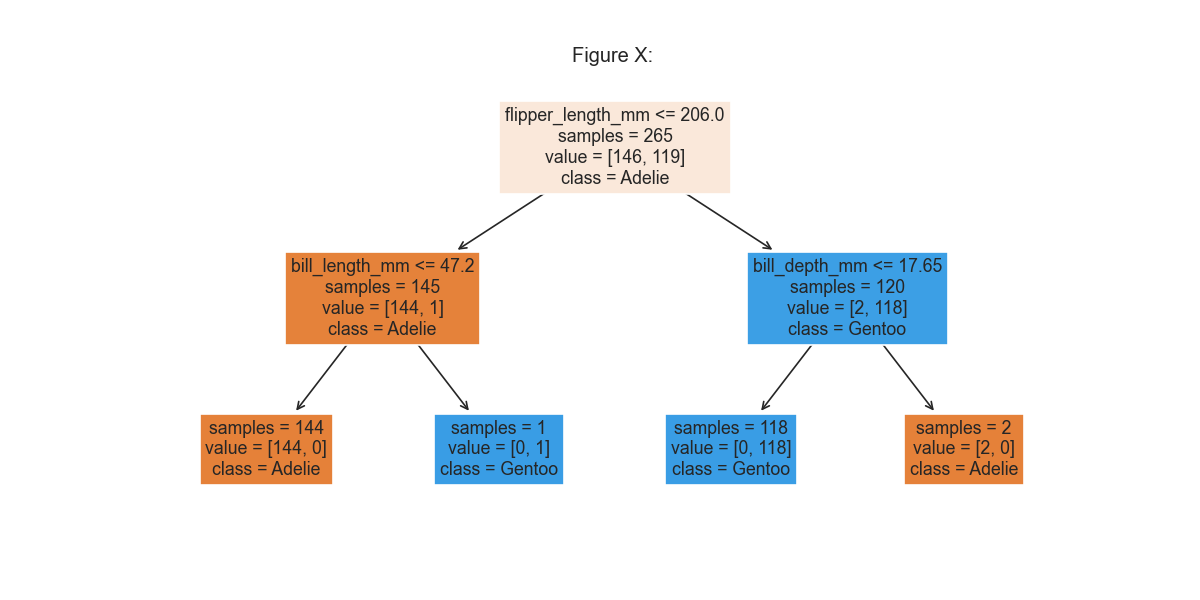

In [3]:
display(Image(os.path.join(image_dir,"Figurex.png")))

In [4]:
# 1
display(datasets['bin']['df'].sample(n=2, random_state=42))

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
254,Gentoo,49.1,14.8,220.0,5150.0
121,Adelie,37.7,19.8,198.0,3500.0


2. using Figure Y classify the following penguins as either a Adelie, Gentoo, or Adelie penguin

species | bill_length_mm |	bill_depth_mm |	flipper_length_mm |	body_mass_g |
-       |-               |-               | -                 | -           |
?       |	35.2	     |15.9	          |186.0	          |3050.0       |
?       |   51.3	     |18.2	          |197.0	          |3750.0       |

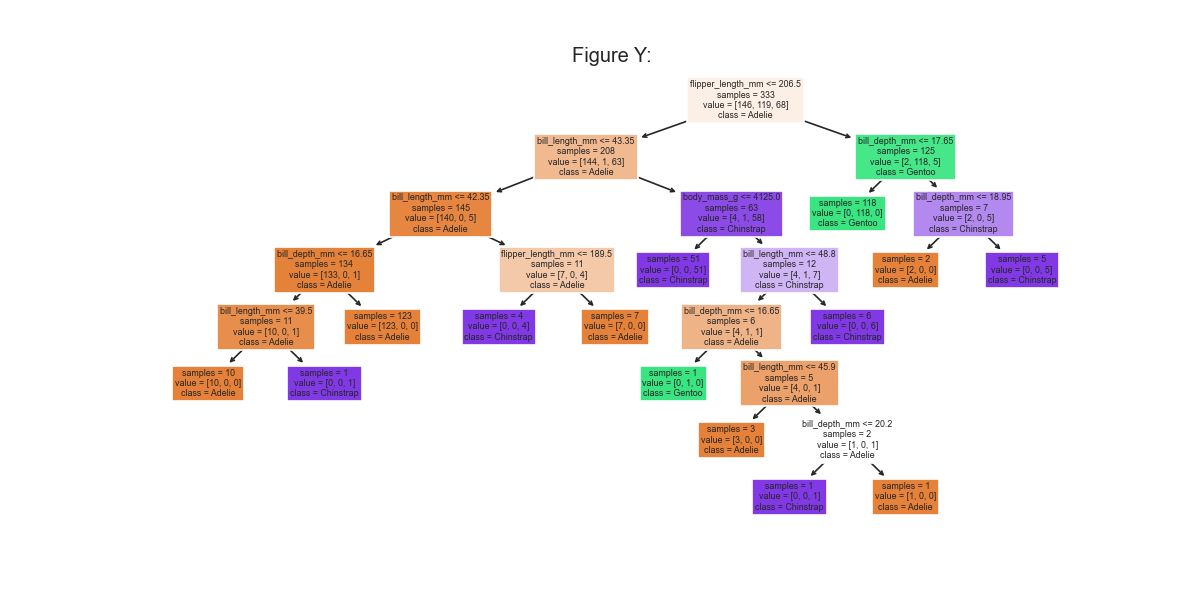

In [5]:
display(Image(os.path.join(image_dir,"Figurey.png")))

In [6]:
display(datasets['multi']['df'].sample(n=2, random_state=3))

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
124,Adelie,35.2,15.9,186.0,3050.0
159,Chinstrap,51.3,18.2,197.0,3750.0


3. Demonstrate why Entropy or Gini impurity is better than classification error for identifying which of the following is a better splitting scenario:

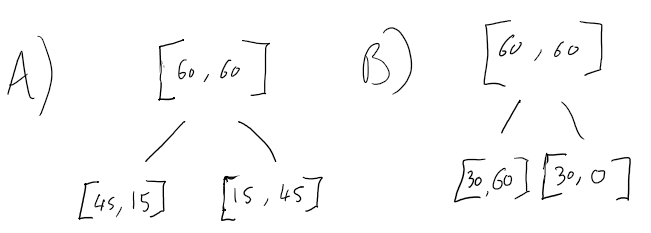

In [46]:
display(Image(os.path.join(image_dir,"exercise.png")))

__Classification Error__

$$
\begin{align}
I_E(D_P) &= 1-\max\{p(i|t)\} \\
         &= 1-\frac{80}{160} \\
         &= 1-\frac{1}{2}    \\
         &= 1-0.5            \\
         &= 0.5              \\
\\ \\
A:I_E(D_\text{left}) &= 1-\max\{p(i|t)\} \\
                     &= 1-\frac{45}{60}    \\
                     &= 1-\frac{3}{4}    \\
                     &= 0.25             \\
A:I_E(D_\text{right}) &= 1-\max\{p(i|t)\} \\
                      &= 1-\frac{45}{60} \\
                      &= 1-\frac{3}{4} \\
                      &= 0.25 \\
A:IG_E &= I(D_p) - \frac{N_\text{left}}{N_p}I(D_\text{left})-\frac{N_\text{right}}{N_p}I(D_\text{right})\\
       &= 0.5 - \frac{60}{120}0.25-\frac{60}{120}0.25 \\
       &= 0.5 - \frac{1}{2}0.25-\frac{1}{2}0.25 \\
       &= 0.5 - 0.125 - 0.125 \\
       &= 0.25
\\ \\
B:I_E(D_\text{left}) &= 1-\max\{p(i|t)\} \\
                     &= 1-\frac{60}{90}    \\
                     &= 1-\frac{2}{3}    \\
                     &= \frac{1}{3}              \\
B:I_E(D_\text{right}) &= 1-\max\{p(i|t)\} \\
                      &= 1-\frac{30}{30} \\
                      &= 1-\frac{1}{1} \\
                      &= 0. \\
B:IG_E &= I(D_p) - \frac{N_\text{left}}{N_p}I(D_\text{left})-\frac{N_\text{right}}{N_p}I(D_\text{right})\\
       &= 0.5 - \frac{90}{120}\times\frac{1}{3}-\frac{30}{120}0. \\
       &= 0.5 - \frac{3}{4}\times\frac{1}{3}-\frac{3}{12}0. \\
       &= 0.5 - 0.25 - 0. \\
       &= 0.25 \\
\\ \\
A:IG_E & = B:IG_E\\
\end{align}
$$

As both have the same splitting criterion, it favours neither $A:IG_E$ or $B:IG_G$.

__Geni Impurity__

$$
\begin{align}
I_G(D_P) &= \sum^c_{i=1}p(i|t)(1-p(i|t)) \\
         &= \frac{60}{120}\left(1-\frac{60}{120}\right)+\frac{60}{120}\left(1-\frac{60}{120}\right) \\
         &= \frac{1}{2}\left(1-\frac{1}{2}\right)+\frac{1}{2}\left(1-\frac{1}{2}\right) \\ 
         &= \frac{1}{2}\left(\frac{1}{2}\right)+\frac{1}{2}\left(\frac{1}{2}\right) \\ 
         &= 0.25+0.25 \\ 
         &= 0.5 \\ 
\\ 
\\
A:I_G(D_\text{left}) &= \sum^c_{i=1}p(i|t)(1-p(i|t)) \\
                     &= \frac{45}{60}\left(1-\frac{45}{60}\right)+\frac{15}{60}\left(1-\frac{15}{60}\right) \\
                     &= \frac{3}{4}\left(1-\frac{3}{4}\right)+\frac{1}{4}\left(1-\frac{1}{4}\right) \\ 
                     &= \frac{3}{4}\left(\frac{1}{4}\right)+\frac{1}{4}\left(\frac{3}{4}\right) \\
                     &= 0.1875+0.1875 \\
                     &= 0.375 \\
A:I_G(D_\text{right}) &= \sum^c_{i=1}p(i|t)(1-p(i|t)) \\
                      &= \frac{15}{60}\left(1-\frac{15}{60}\right)+\frac{45}{60}\left(1-\frac{45}{60}\right) \\
                      &= \frac{1}{4}\left(1-\frac{1}{4}\right)+\frac{3}{4}\left(1-\frac{3}{4}\right) \\ 
                      &= \frac{1}{4}\left(\frac{3}{4}\right)+\frac{3}{4}\left(\frac{1}{4}\right) \\
                      &= 0.1875+0.1875 \\
                      &= 0.375 \\
A:IG_G &= I_G(D_p) - \frac{N_\text{left}}{N_p}I_G(D_\text{left})-\frac{N_\text{right}}{N_p}I_G(D_\text{right})\\
       &= 0.5 - \frac{60}{120}0.375-\frac{60}{120}0.375 \\
       &= 0.5 - \frac{1}{2}0.375-\frac{1}{2}0.375 \\
       &= 0.5 - 0.1875 - 0.1875 \\
       &= 0.125 \\
\\ 
\\
B:I_G(D_\text{left}) &= \sum^c_{i=1}p(i|t)(1-p(i|t)) \\
                     &= \frac{30}{90}\left(1-\frac{30}{90}\right)+\frac{60}{90}\left(1-\frac{60}{90}\right) \\
                     &= \frac{1}{3}\left(1-\frac{1}{3}\right)+\frac{2}{3}\left(1-\frac{2}{3}\right) \\
                     &= \frac{1}{3}\left(\frac{2}{3}\right)+\frac{2}{3}\left(\frac{1}{3}\right) \\
                     &= 0.22 + 0.22 \\
                     &= 0.44 \\
B:I_G(D_\text{right}) &= \sum^c_{i=1}p(i|t)(1-p(i|t)) \\
                     &= \frac{30}{30}\left(1-\frac{30}{30}\right)+\frac{0}{30}\left(1-\frac{0}{30}\right) \\
                     &= \frac{1}{1}\left(1-\frac{1}{1}\right)+\frac{0}{30}\left(1-\frac{0}{30}\right) \\
                     &= \frac{1}{1}\left(0\right)+\frac{0}{30}\left(1\right) \\
                     &= 0+0 \\
                     &= 0 \\
B:IG_G &= I_G(D_p) - \frac{N_\text{left}}{N_p}I_G(D_\text{left})-\frac{N_\text{right}}{N_p}I_G(D_\text{right})\\
       &= 0.5 - \frac{90}{120}0.44-\frac{30}{120}0. \\
       &= 0.5 - \frac{3}{4}0.44-\frac{1}{4}0. \\
       &= 0.5 - 0.33 - 0. \\
       &= 0.17 \\
\\ \\
A:IG_G & < B:IG_G\\
\end{align}
$$

As Geni Impurity favors the _larger_ value, it favours split $B:IG_G$.

__Entropy__
$$
\begin{align}
I_H(D_P) &= -\sum^c_{i=1}p(i|t)\log_2p(i|t) \\
         &= -\left(\frac{60}{120}\log_2\left(\frac{60}{120}\right)+\frac{60}{120}\log_2\left(\frac{60}{120}\right)\right) \\
         &= -\left(\frac{1}{2}\log_2\left(\frac{1}{2}\right)+\frac{1}{2}\log_2\left(\frac{1}{2}\right)\right) \\
         &= -\left(\frac{1}{2}(-1)+\frac{1}{2}(-1)\right) \\
         &= -(-0.5+-0.5) \\
         &= 1 \\
\\ 
\\
A:I_H(D_\text{left}) &= -\sum^c_{i=1}p(i|t)\log_2p(i|t) \\
                     &= -\left(\frac{45}{60}\log_2\left(\frac{45}{60}\right)+\frac{15}{60}\log_2\left(\frac{15}{60}\right)\right) \\
                     &= -\left(\frac{3}{4}\log_2\left(\frac{3}{4}\right)+\frac{1}{4}\log_2\left(\frac{1}{4}\right)\right) \\
                     &= -\left(\frac{3}{4}\left(-0.42\right)+\frac{1}{4}\left(-2\right)\right) \\
                     &= -\left(-0.315+-0.5\right) \\
                     &= 0.815 \\
A:I_H(D_\text{right}) &= -\sum^c_{i=1}p(i|t)\log_2p(i|t) \\
                      &= -\left(\frac{15}{60}\log_2\left(\frac{15}{60}\right)+\frac{45}{60}\log_2\left(\frac{45}{60}\right)\right) \\
                      &= -\left(\frac{1}{4}\log_2\left(\frac{1}{4}\right)+\frac{3}{4}\log_2\left(\frac{3}{4}\right)\right) \\
                      &= -\left(\frac{1}{4}\left(-2\right)+\frac{3}{4}\left(-0.42\right)\right) \\
                      &= -\left(-0.5+-0.315\right) \\
                      &= 0.815 \\
A:IG_H &= I_H(D_p) - \frac{N_\text{left}}{N_p}I_H(D_\text{left})-\frac{N_\text{right}}{N_p}I_H(D_\text{right})\\
       &= 1 - \frac{60}{120}0.815-\frac{60}{120}0.815 \\
       &= 1 - \frac{1}{2}0.815-\frac{1}{2}0.815 \\
       &= 1 - 0.4075 - 0.4075 \\
       &= 0.185 \\
\\ 
\\
B:I_H(D_\text{left}) &= -\sum^c_{i=1}p(i|t)\log_2p(i|t) \\
                     &= -\left(\frac{30}{90}\log_2\left(\frac{30}{90}\right)+\frac{60}{90}\log_2\left(\frac{60}{90}\right)\right) \\
                     &= -\left(\frac{1}{3}\log_2\left(\frac{1}{3}\right)+\frac{2}{3}\log_2\left(\frac{2}{3}\right)\right) \\
                     &= -\left(\frac{1}{3}\left(-1.58\right)+\frac{2}{3}\left(-0.58\right)\right) \\
                     &= -\left(-0.527+-0.387\right) \\
                     &= 0.914 \\
B:I_H(D_\text{right}) &= -\sum^c_{i=1}p(i|t)\log_2p(i|t) \\
                      &= -\left(\frac{30}{30}\log_2\left(\frac{30}{30}\right)+\frac{0}{30}\log_2\left(\frac{0}{30}\right)\right) \\
                      &= -\left(\frac{1}{1}\log_2\left(\frac{1}{1}\right)+\frac{0}{30}\log_2\left(\frac{0}{30}\right)\right) \\
                      &= -\left(\frac{1}{1}\left(0\right)+\frac{0}{30}\left(-0\right)\right) \\
                      &= -\left(0+0\right) \\
                      &= 0 \\
B:IG_H &= I_H(D_p) - \frac{N_\text{left}}{N_p}I_H(D_\text{left})-\frac{N_\text{right}}{N_p}I_H(D_\text{right})\\
       &= 1 - \frac{90}{120}0.914-\frac{30}{120}0 \\
       &= 1 - \frac{3}{4}0.914-\frac{1}{4}0 \\
       &= 1 - 0.6855 - 0 \\
       &= 0.3145 \\
\\ \\
A:IG_H & < B:IG_H\\
\end{align}
$$

As Entropy favors the _larger_ value (maximizes information gain) so favours split $B:IG_H$.

# Question 4
Assume we have three base classifiers in a majority voting ensemble and $C_j(j \in {0,1})$. Each classifier predicts the following:
$$
C_1(x) \rightarrow 0, C_2(x) \rightarrow 0, C_3(x) \rightarrow 1
$$
What is the predicted class of the majority voting ensemble if...

a. ...no weights are assigned?

b. ...$C_1$ and $C_2$ have a weight of 0.2, and $C_3$ has a weight of 0.6?

c. ...the classifiers have weights as in b, but instead predict $C_1(x) \rightarrow [0.9,0.1], C_2(x) \rightarrow [0.8,0.2], C_3(x) \rightarrow [0.4,0.6]$

## Answer
a. $\hat y = \text{mode}\{0,0,1\} = 0$

b. 
$$
\begin{align}
\hat y &= {\arg\max \atop i} \sum^m_{j=1}w_jI_A(C_j(x)=i) \\
       &= {\arg\max \atop i}[0.2\times i_0+0.2\times i_0+0.6\times i_1] \\
       &= 1
\end{align}
$$

c.
$$
\begin{align}
\hat y &= {\arg\max \atop i}[p(i_0|x), p(i_1|x)] \\
       &= p(i_0|x) = 0.2 \times 0.9 + 0.2 \times 0.8 + 0.6 \times 0.4 = 0.58 \\
       &= p(i_1|x) = 0.2 \times 0.1 + 0.2 \times 0.2 + 0.6 \times 0.6 = 0.42 \\
       &= 0
\end{align}
$$

__TODO__
- write more exercises

In [1]:
# Convert to pdf without code showing
!jupyter nbconvert ./Trees_Exercise_Answers.ipynb --to=pdf --TemplateExporter.exclude_input=True

[NbConvertApp] Converting notebook ./Exercises.ipynb to pdf
[NbConvertApp] Support files will be in Exercises_files\
[NbConvertApp] Making directory .\Exercises_files
[NbConvertApp] Making directory .\Exercises_files
[NbConvertApp] Writing 46613 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | b had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 89517 bytes to Exercises.pdf
